## **CLEAN, STRATIFY and SUBSET THE DATASET**

 **Posts Dataset**

INFO:root:Data loaded successfully.
INFO:root:Data cleaned successfully.
INFO:root:Data stratified successfully.


Distribution of Posts per Month:
               Count  Percentage
created_month                   
January        47507   10.624732
September      40518    9.061673
July           40056    8.958348
February       39300    8.789272
August         38798    8.677002
December       38289    8.563166
October        36475    8.157473
March          36126    8.079421
November       34705    7.761621
April          33067    7.395289
June           31434    7.030076
May            30861    6.901927


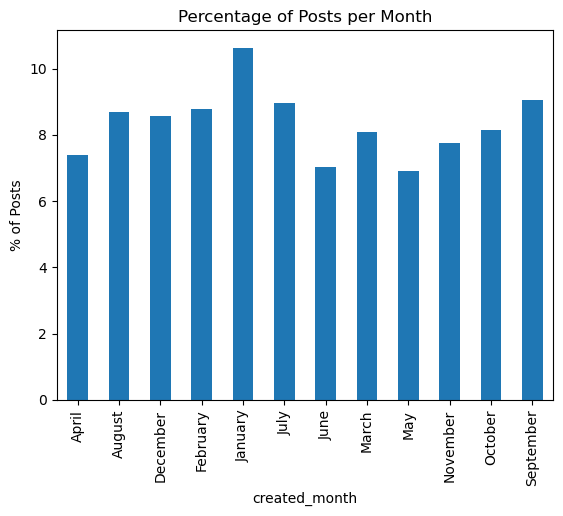


Distribution of Over 18 Posts:
          Count  Percentage
over_18                    
False    438954   98.170132
True       8182    1.829868


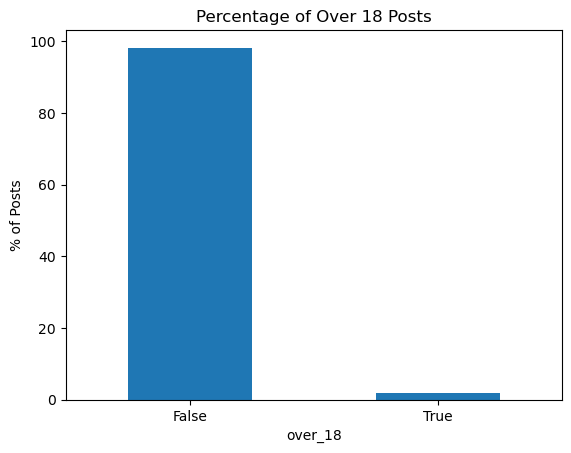


Distribution of Posts by Number of Comments:
                   Count  Percentage
comment_category                    
Very Low [1-10]   354398   79.259554
No comments        51593   11.538548
Medium [11-50]     26883    6.012265
Very High [101+]    9188    2.054856
High [51-100]       5074    1.134778


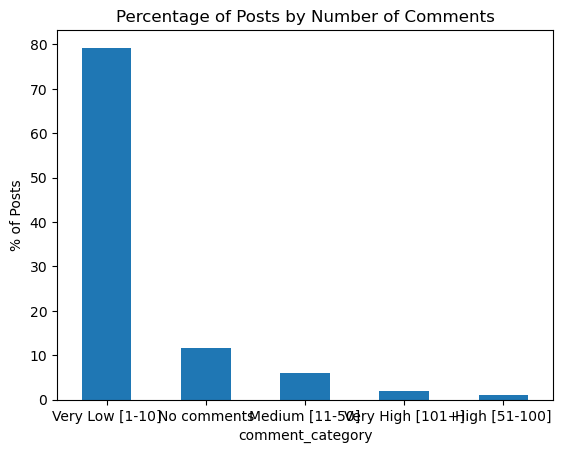


Distribution of Posts by Time of Day:
                       Count  Percentage
time_of_day                             
Evening ]6pm-12pm]    130458   29.176358
Afternoon ]12am-6pm]  129516   28.965684
Night [0am-6am]       101722   22.749678
Morning ]6am-12am]     85440   19.108280


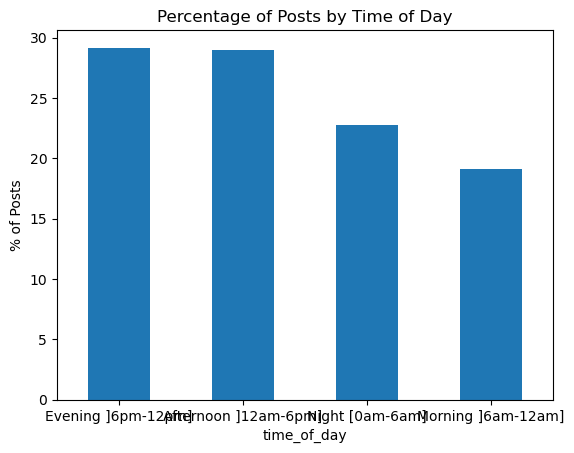


Distribution of Posts by Score:
                   Count  Percentage
score_category                      
Low [1-50]        385562   86.229246
High [101-500]     20382    4.558345
Very High [501+]   17972    4.019359
Medium [51-100]    15021    3.359381
Zero                8199    1.833670


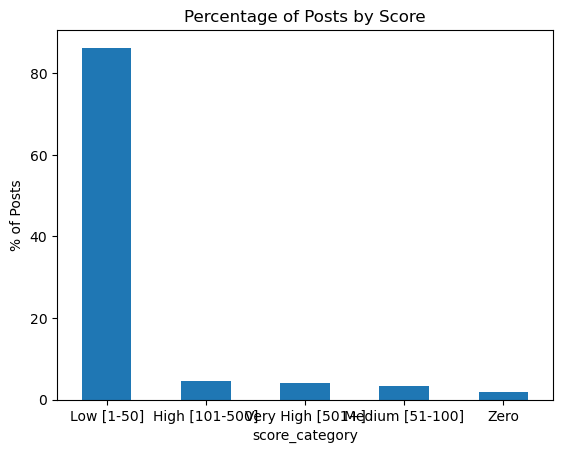

INFO:root:Data distributions analyzed.
INFO:root:Strata counts before filtering:
INFO:root:strata
September-False-Very Low [1-10]-Evening ]6pm-12pm]-Low [1-50]      9892
September-False-Very Low [1-10]-Afternoon ]12am-6pm]-Low [1-50]    9855
August-False-Very Low [1-10]-Evening ]6pm-12pm]-Low [1-50]         9571
July-False-Very Low [1-10]-Afternoon ]12am-6pm]-Low [1-50]         9442
August-False-Very Low [1-10]-Afternoon ]12am-6pm]-Low [1-50]       9419
                                                                   ... 
May-False-No comments-Morning ]6am-12am]-Very High [501+]             1
May-False-High [51-100]-Afternoon ]12am-6pm]-Medium [51-100]          1
May-False-No comments-Night [0am-6am]-Very High [501+]                1
May-True-No comments-Morning ]6am-12am]-Zero                          1
December-False-Medium [11-50]-Night [0am-6am]-Zero                    1
Name: count, Length: 1519, dtype: int64
INFO:root:Strata counts after filtering:
INFO:root:strata
September-Fa

In [1]:
# Import functions from posts.py
from preprocess_subset_function import load_jsonl_to_dataframe, clean_data, stratify_data, analyze_distributions, create_subset

# Define the path to your JSONL file
jsonl_file_path = r"C:\Users\lnpg1\Desktop\NOVASBE\00_TESE\DATASET 2023\r_memes_posts_2023.jsonl"

# Load the dataset
df = load_jsonl_to_dataframe(jsonl_file_path)

# Clean, stratify, analyze, and create a subset
df_cleaned = clean_data(df)
df_stratified = stratify_data(df_cleaned)
analyze_distributions(df_stratified)
subset_df = create_subset(df_stratified)

INFO:root:Data stratified successfully.


Distribution of Posts per Month:
               Count  Percentage
created_month                   
January         9499   10.626706
September       8099    9.060500
July            8005    8.955341
February        7856    8.788652
August          7757    8.677899
December        7659    8.568264
October         7294    8.159932
March           7223    8.080503
November        6938    7.761668
April           6613    7.398085
June            6281    7.026670
May             6164    6.895780


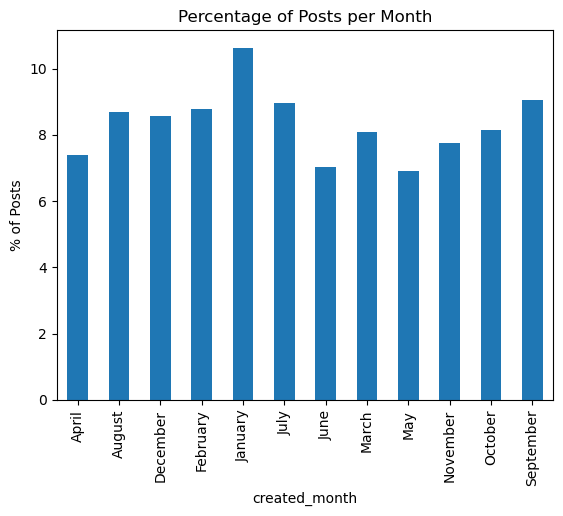


Distribution of Over 18 Posts:
         Count  Percentage
over_18                   
False    87762   98.180964
True      1626    1.819036


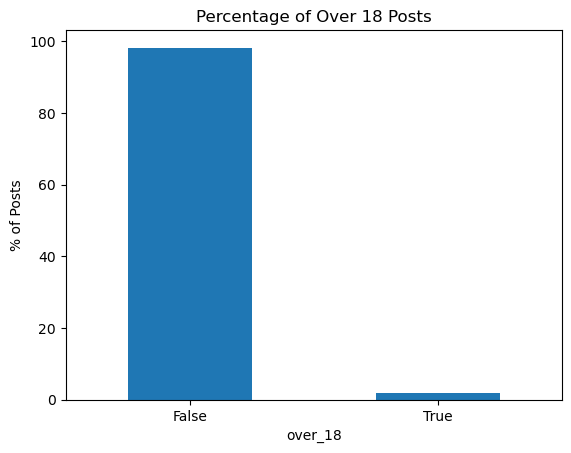


Distribution of Posts by Number of Comments:
                  Count  Percentage
comment_category                   
Very Low [1-10]   70870   79.283573
No comments       10309   11.532868
Medium [11-50]     5375    6.013111
Very High [101+]   1826    2.042780
High [51-100]      1008    1.127668


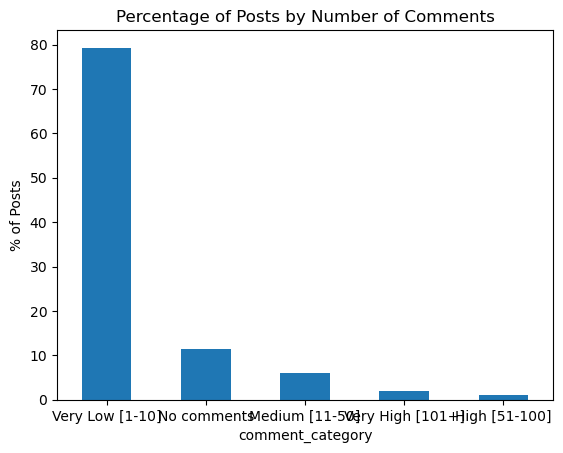


Distribution of Posts by Time of Day:
                      Count  Percentage
time_of_day                            
Evening ]6pm-12pm]    26088   29.185126
Afternoon ]12am-6pm]  25895   28.969213
Night [0am-6am]       20330   22.743545
Morning ]6am-12am]    17075   19.102117


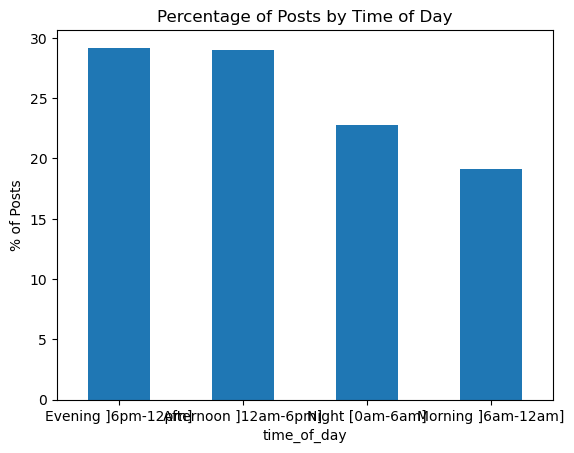


Distribution of Posts by Score:
                  Count  Percentage
score_category                     
Low [1-50]        77106   86.259901
High [101-500]     4068    4.550946
Very High [501+]   3598    4.025149
Medium [51-100]    2990    3.344968
Zero               1626    1.819036


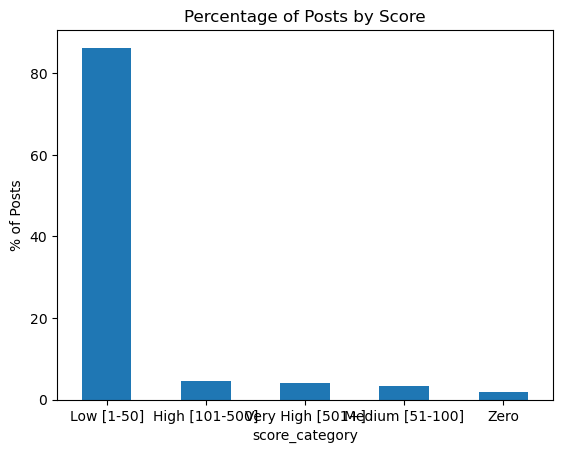

INFO:root:Data distributions analyzed.


In [2]:
df_subset_stratified = stratify_data(subset_df)
analyze_distributions(df_subset_stratified)

 **Now, with the subset of posts we created, let's use it to subset the Comments Dataset**

In [2]:
import json
import pandas as pd

# Load the reference dataset that contains the 'name' column (adjust as needed)
df_reference = subset_df

# Create a set of valid link_id values from the 'name' column
valid_link_ids = set(df_reference['name'].astype(str))  # Ensure that the values are strings

# Path to the original JSONL file
jsonl_file_path_comments = r"C:\Users\lnpg1\Desktop\NOVASBE\00_TESE\DATASET 2023\r_memes_comments_2023.jsonl"

# Path to the new filtered JSONL file
filtered_jsonl_file_path = r"C:\Users\lnpg1\Desktop\NOVASBE\00_TESE\DATASET 2023\filtered_comments.jsonl"

# Define your filtering criteria based on link_id
def filter_criteria(json_object):
    # Check if the link_id is in the set of valid link_ids
    return json_object.get('link_id') in valid_link_ids

# Process the JSONL file line by line
with open(jsonl_file_path_comments, 'r') as infile, open(filtered_jsonl_file_path, 'w') as outfile:
    for line in infile:
        try:
            # Parse each line as a JSON object
            json_obj = json.loads(line)
            
            # Apply your filtering criteria
            if filter_criteria(json_obj):
                # Write the filtered object back to the new JSONL file
                outfile.write(json.dumps(json_obj) + '\n')
        
        except json.JSONDecodeError:
            # Handle any malformed JSON objects
            print("Skipping malformed line")


In [3]:
jsonl_file_path_filtered = r"C:\Users\lnpg1\Desktop\NOVASBE\00_TESE\DATASET 2023\filtered_comments.jsonl"

with open(jsonl_file_path_filtered, 'r') as f:
    data = [json.loads(line) for line in f]

df_comments_subset = pd.DataFrame(data)

In [4]:
df_comments_subset.to_csv(r"C:\Users\lnpg1\Desktop\NOVASBE\00_TESE\DATASET 2023\2023_rmemes_comments_subset.csv", index=False)

In [6]:
df_comments_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077311 entries, 0 to 1077310
Data columns (total 78 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   all_awardings                    1077311 non-null  object 
 1   archived                         1077311 non-null  bool   
 2   associated_award                 0 non-null        object 
 3   author                           1077311 non-null  object 
 4   author_created_utc               362726 non-null   float64
 5   author_flair_background_color    242531 non-null   object 
 6   author_flair_css_class           36850 non-null    object 
 7   author_flair_richtext            987277 non-null   object 
 8   author_flair_template_id         116598 non-null   object 
 9   author_flair_text                153434 non-null   object 
 10  author_flair_text_color          254858 non-null   object 
 11  author_flair_type                987277 non-null  

In [7]:
subset_df.to_csv(r"C:\Users\lnpg1\Desktop\NOVASBE\00_TESE\DATASET 2023\2023_rmemes_posts_subset.csv", index=False)